In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import hilbert, firwin, lfilter, butter



np.random.seed(0) 

# Amplitude Modulation (AM)

The equation for AM modulation is defined by: 

$s(t) = A_c [1 + k_a m(t)] cos(2 \pi f_c t)$

In this equation, $s(t)$ represents the signal after modulation. $A_c$ and $f_c$ represent the amplitude and frequency of the carrier, respectively. 

The most important terms are $k_a$ and $m(t)$, where $m(t)$ is the original signal containing the information we want to modulate, and $k_a$ is a constant called the amplitude sensitivity of the modulator responsible for generating the modulated signal.

Modulation is only present when $|k_a m(t)| < 1$.

If this assumption is not true, i.e. $k_a$ is greater than $1$, we get an overmodulated signal, which is the aim of this activity.  

For this simulation we will define $\mu = k_am(t)$ and we will analyze $\mu$ for three different values, $\mu = 0.5$ and $\mu = 1$, which in these cases will have modulation and $\mu = 2$ which will have overmodulation.

The following modulation was made from the topic "COMPUTER EXPERIMENT: AM" taken from the textbook.


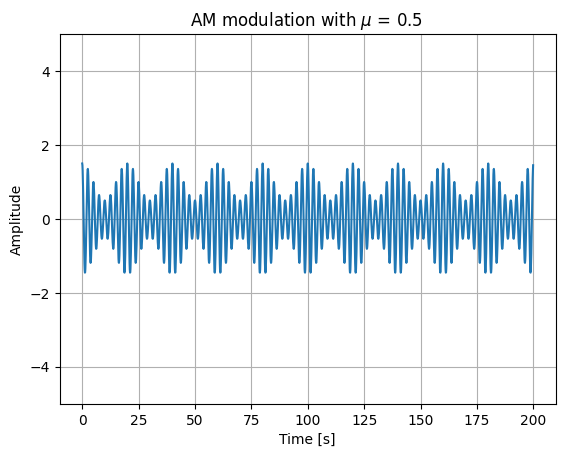

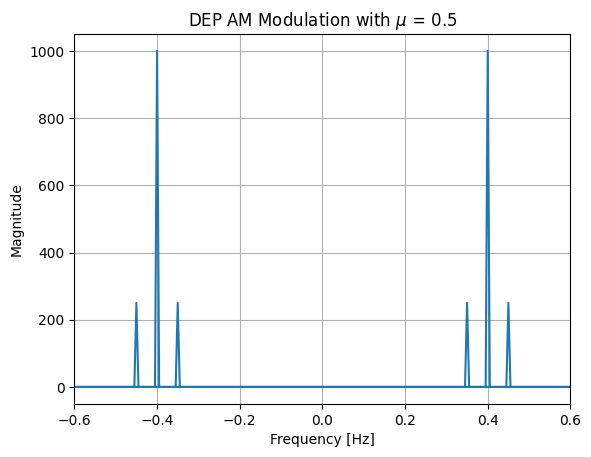

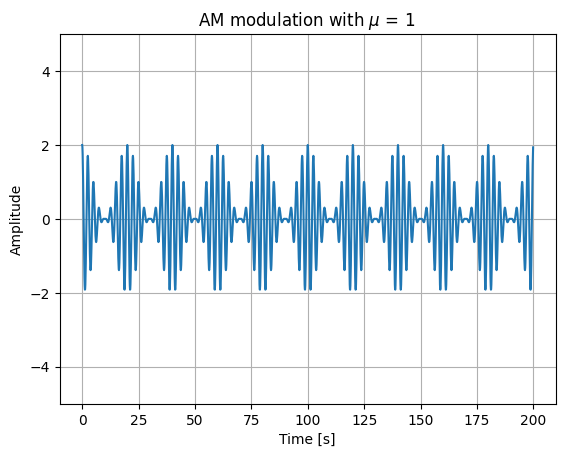

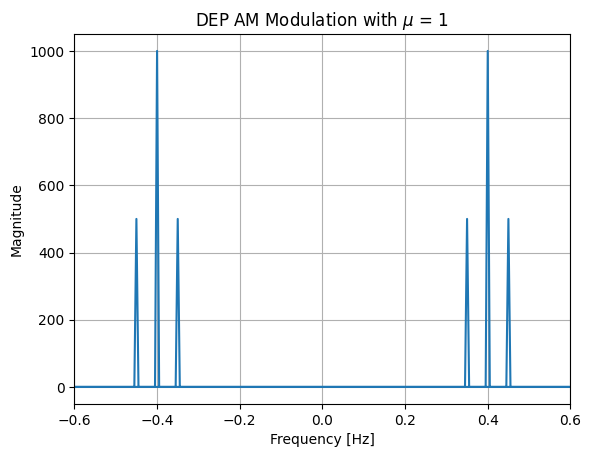

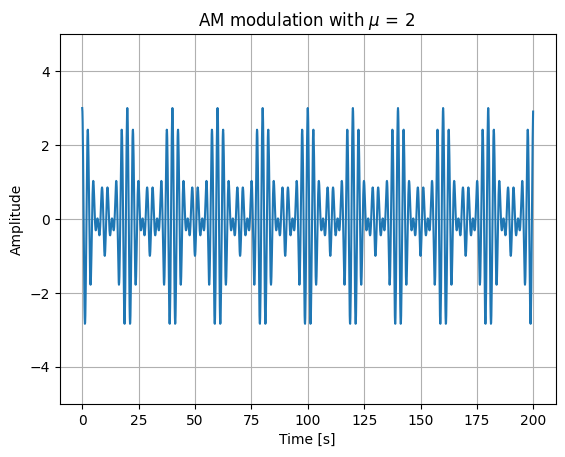

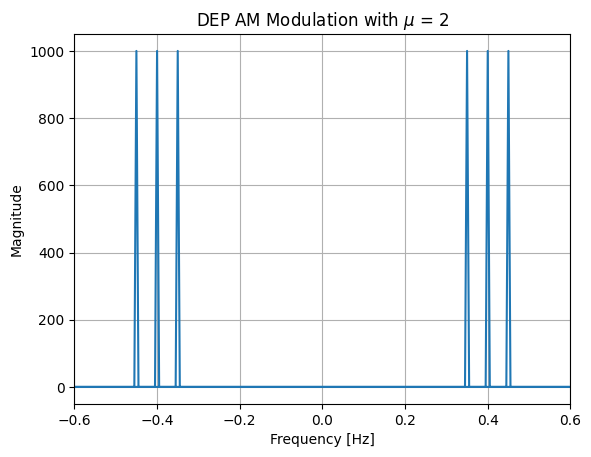

In [92]:
samples = 2000
ac = 1
fc = 0.4
fm = 0.05
fs = 10
k = [0.5, 1, 2]
m_t = 0
M = 2000

t = np.arange(samples)/fs

for k in k:
    m_t = np.cos(2*np.pi*fm*t)
    s_t1 = ac*(1 + k*m_t)*np.cos(2*np.pi*fc*t)
    plt.figure()
    plt.plot(t, s_t1)
    plt.title(f'AM modulation with $\mu$ = {k} ')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.ylim(-5,5)
    plt.grid()
    plt.show()

    fft_result = np.fft.fft(s_t1, M)
    fft_freq = np.fft.fftfreq(M, 1/fs)

    # Ploting the FFT
    plt.figure()
    plt.plot(fft_freq, np.abs(fft_result))
    plt.title(f'DEP AM Modulation with $\mu$ = {k}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim([-0.6, 0.6])  # Limitar faixa de frequência para -5Hz a 5Hz
    plt.grid(True)
    plt.show()





# Double-Sideband Suppressed-Carrier (DSB-SC) Modulation
In DSB-SC modulation, the equation is given by:

$s(t) = c(t)m(t) \therefore s(t) = A_c\cos(2\pi f_ct)m(t)$


The most important term is $m(t)$, which is the original signal containing the information we want to modulate. Unlike standard AM, DSB-SC modulation does not include a carrier term, meaning the carrier is suppressed, and only the sidebands carry the information.

For DSB-SC modulation, the condition for proper modulation is that the product $A_c\cos(2\pi f_ct)$ must be within the linear range of the modulator.

This modulation technique is more power-efficient compared to standard AM because it does not transmit the carrier, reducing the amount of power required for transmission.

The following modulation was made from the topic "COMPUTER EXPERIMENT: DSB-SC" taken from the textbook.

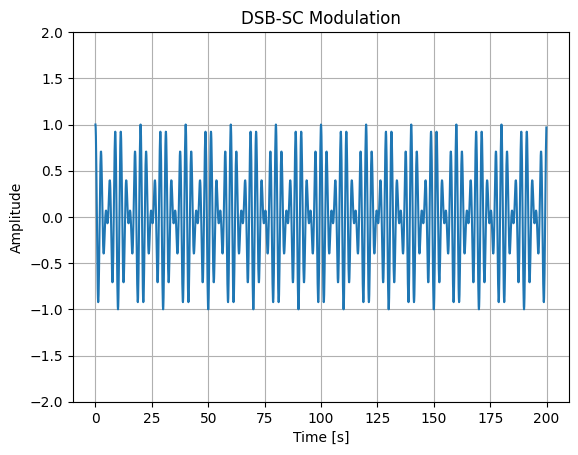

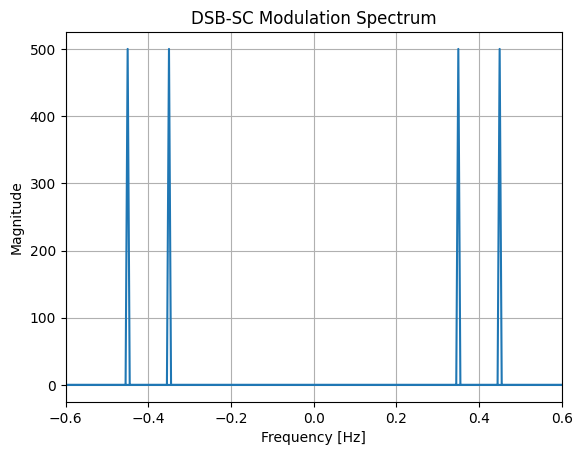

In [93]:
m_t = np.cos(2*np.pi*fm*t)
dsb_sc = ac*m_t*np.cos(2*np.pi*fc*t)
plt.figure()
plt.plot(t, dsb_sc)
plt.title('DSB-SC Modulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_result_dsb = np.fft.fft(dsb_sc, M)
fft_freq_dsb = np.fft.fftfreq(M, 1/fs)

# Ploting the FFT
plt.figure()
plt.plot(fft_freq_dsb, np.abs(fft_result_dsb))
plt.title('DSB-SC Modulation Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])  # Limiting frequency range
plt.grid()
plt.show()


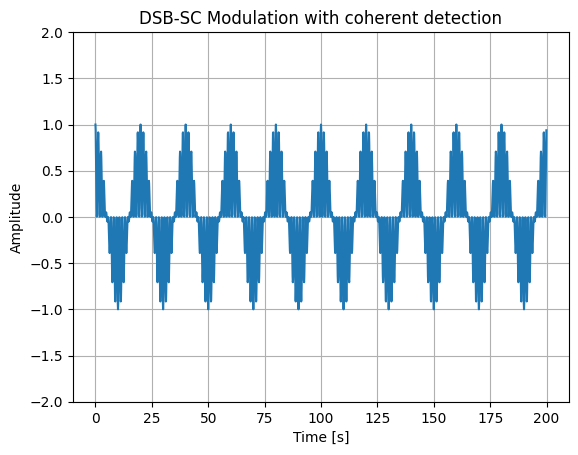

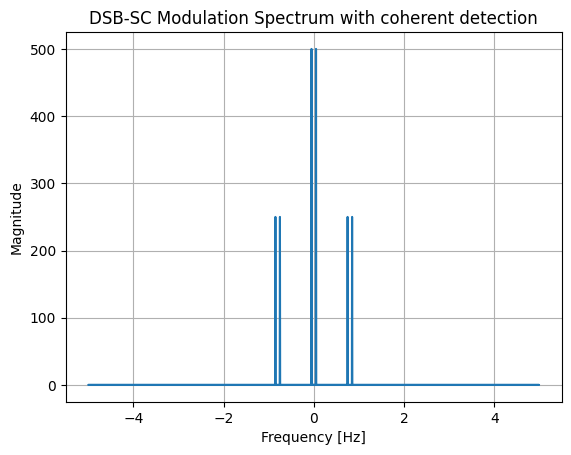

In [94]:
# Making the coherent detection of the DSB-SC signal
s_t2 = dsb_sc*np.cos(2*np.pi*fc*t)
plt.figure()
plt.plot(t, s_t2)
plt.title('DSB-SC Modulation with coherent detection')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_result_dsbcoe = np.fft.fft(s_t2, M)
fft_freq_dsbcoe = np.fft.fftfreq(M, 1/fs)

# Ploting the FFT
plt.figure()
plt.plot(fft_freq_dsbcoe, np.abs(fft_result_dsbcoe))
plt.title('DSB-SC Modulation Spectrum with coherent detection')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

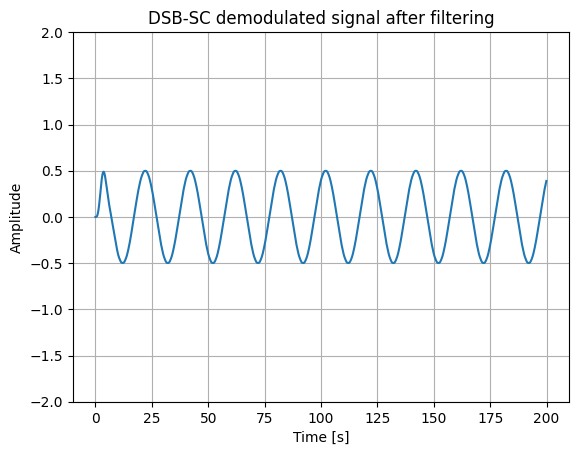

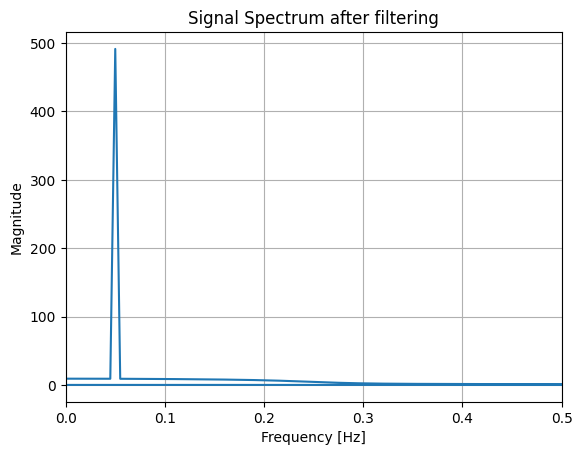

In [95]:
# Low-pass filter

fc = 0.05  # Cut-off frequency of the filter
b, a = butter(5, fc, 'low', analog=False)
s_t2_filtrado = lfilter(b, a, s_t2)

plt.figure()
plt.plot(t, s_t2_filtrado)
plt.title('DSB-SC demodulated signal after filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_freq_dsb_dem = np.fft.fftfreq(M, 1/fs)
fft_result_dsb_dem = np.fft.fft(s_t2_filtrado, M)

# Ploting the FFT
plt.figure()
plt.plot(fft_freq_dsb_dem, np.abs(fft_result_dsb_dem))
plt.title('Signal Spectrum after filtering')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 0.5])
plt.grid()
plt.show()

# Single Side Band (SSB) Modulation
In SSB modulation, the equation is given by:

$s(t)=A_c[m(t)\cos(2\pi f_ct)\pm \^{m}(t)\sin(2\pi f_c t)]$

The most important terms are $m(t)$ and $\^{m}(t)$. $m(t)$ is the original signal containing the information we want to modulate, and $\^{m}(t)$
 (t) is the Hilbert transform of $m(t)$. The $\pm$ sign determines whether the upper sideband (USB) or lower sideband (LSB) is transmitted.

SSB modulation is highly efficient in terms of bandwidth and power. It transmits only one sideband, either the upper or the lower, effectively halving the bandwidth required compared to standard AM and DSB-SC. This efficiency makes SSB a preferred choice in many communication systems, especially where bandwidth is limited.

In addition, SSB modulation can be seen as essentially DSB-SC modulation but with only one of its sidebands (upper sideband or lower sideband).

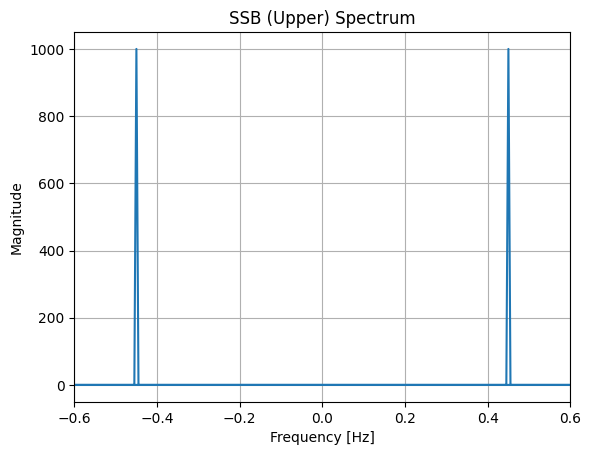

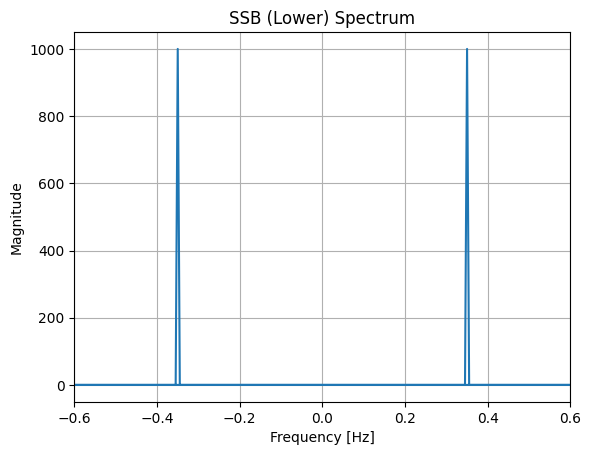

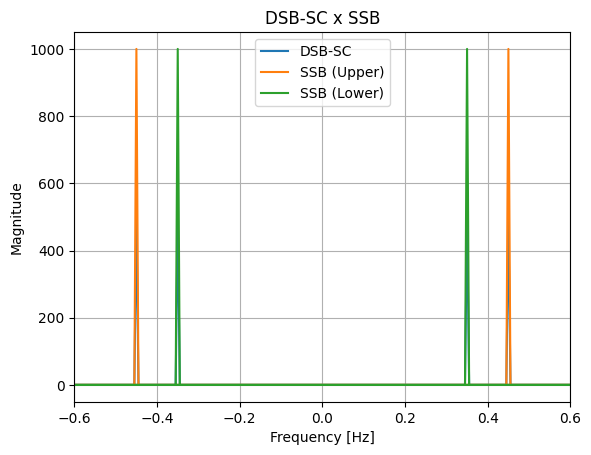

In [96]:
samples = 2000
fc = 0.4
fm = 0.05
fs = 10
t = np.arange(0, samples/fs, 1/fs)
m_t = np.cos(2 * np.pi * fm * t)  # Sinal de mensagem
M = 2000

# Making the hilbert transform of the message signal
m_t_hilbert = np.imag(hilbert(m_t))

# SSB (Upper Sideband - USB)
usb = m_t * np.cos(2 * np.pi * fc * t) - m_t_hilbert * np.sin(2 * np.pi * fc * t)

# SSB (Lower Sideband - LSB)
lsb = m_t * np.cos(2 * np.pi * fc * t) + m_t_hilbert * np.sin(2 * np.pi * fc * t)


# Ploting the SSB signals in the frequency domain
fft_usb = np.fft.fft(usb, M)
fft_freq_usb = np.fft.fftfreq(M, 1/fs)
fft_lsb = np.fft.fft(lsb, M)
fft_freq_lsb = np.fft.fftfreq(M, 1/fs)

# Ploting the FFT
plt.figure()
plt.plot(fft_freq_usb, np.abs(fft_usb))
plt.title('SSB (Upper) Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])
plt.grid()
plt.show()

plt.figure()
plt.plot(fft_freq_lsb, np.abs(fft_lsb))
plt.title('SSB (Lower) Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])
plt.grid()
plt.show()

# Comparing the SSB signals with the DSB-SC signal in the frequency domain
plt.figure()
plt.plot(fft_freq_dsb, np.abs(fft_result_dsb), label='DSB-SC')
plt.plot(fft_freq_usb, np.abs(fft_usb), label='SSB (Upper)')
plt.plot(fft_freq_lsb, np.abs(fft_lsb), label='SSB (Lower)')
plt.title('DSB-SC x SSB')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])
plt.legend()
plt.grid()
plt.show()




We can see that the USB and LSB modulations overlapped with the DSB-SC modulation, thus demonstrating the success of the modulation.

#   Vestigial Side Band (VSB) Modulation

The equation for Vestigial Sideband (VSB) modulation is a bit more complex due to the nature of the modulation technique, which is defined by a combination of AM and SSB principles. 

The simplest way to apply VSB modulation would be to take a DSB-SC modulated signal and then apply an $H(f)$ filter that defines the VSB shape, this filter is defined by:

$H(f + f_c) + H(f - f_c) = 1, -W \leq f \leq W$

Where $f_c$ is the carrier frequency

VSB modulation transmits one sideband in its entirety and a portion of the other sideband (the vestigial sideband). This technique retains some of the benefits of SSB modulation in terms of bandwidth efficiency while making it easier to demodulate the signal.

For VSB modulation, the transmitted signal is a compromise between bandwidth efficiency and the simplicity of demodulation. The design of the filter used to achieve the vestigial sideband is crucial for the performance of this modulation technique.

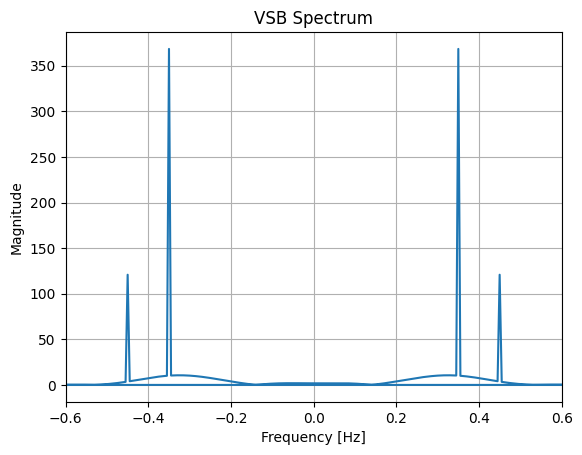

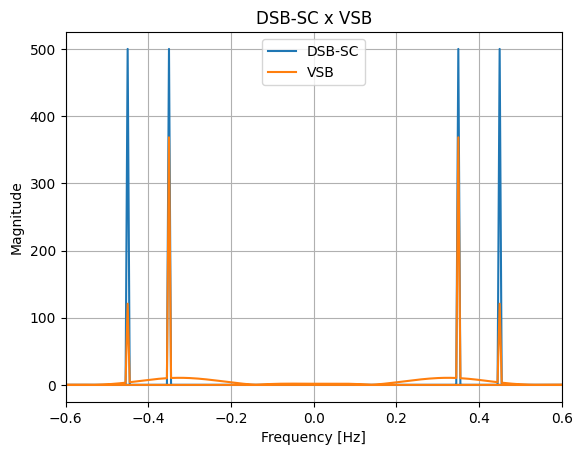

In [106]:
# Creating the VSB signal using the DSB-SC signal and a low-pass filter (VSB filter)
nyquist_rate = fs / 2
cutoff = fc / nyquist_rate
numtaps = 101
vsb_filter = firwin(numtaps, cutoff)

# Applying the VSB filter to the DSB-SC signal
vsb = lfilter(vsb_filter, 1.0, dsb_sc)

# Ploting the FFT
fft_result_vsb = np.fft.fft(vsb, samples)
fft_freq_vsb = np.fft.fftfreq(samples, 1/fs)

plt.figure()
plt.plot(fft_freq_vsb, np.abs(fft_result_vsb))
plt.title('VSB Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])
plt.grid()
plt.show()

# Comparing the VSB signal with the DSB-SC signal in the frequency domain
plt.figure()
plt.plot(fft_freq_dsb, np.abs(fft_result_dsb), label='DSB-SC')
plt.plot(fft_freq_vsb, np.abs(fft_result_vsb), label='VSB')
plt.title('DSB-SC x VSB')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])
plt.legend()
plt.grid()
plt.show()
